# Intelligent Agents: Vacuum-cleaner World


## Instructions

Total Points: 10

Complete this notebook and submit it. The notebook needs to be a complete project report with 

* your implementation,
* documentation including a short discussion of how your implementation works and your design choices, and
* experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. 

Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square is cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To starte, the agent is placed on a random square.

__Actuators:__ The agent can `clean` the current square or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [4]:
from numpy import random


def simple_randomized_agent(bumpers, dirty):
    actions = ['north', 'east', 'south', 'west', 'suck']
    return random.choice(actions)

In [5]:
simple_randomized_agent({"north" : True, "east" : False, "south" : False, "west" : True}, True)

'north'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

This simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns the performance measure which is here the number of cleaned squares (since all squares are constantly dirty, it is the number of `suck` actions by the agent). 

In [6]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with 20 steps.

In [7]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: south
step 1 - action: suck
step 2 - action: south
step 3 - action: north
step 4 - action: east
step 5 - action: south
step 6 - action: south
step 7 - action: south
step 8 - action: east
step 9 - action: east
step 10 - action: north
step 11 - action: suck
step 12 - action: north
step 13 - action: west
step 14 - action: suck
step 15 - action: west
step 16 - action: south
step 17 - action: suck
step 18 - action: suck
step 19 - action: suck


6

# Tasks

_Submission Instructions:_ Use this notebook to prepare your submission. Complete this section with your code and results. You can add additional Markdown blocks for your description, comments in the code and use mathplotlib to produce charts. 

_Note:_ Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design. 


## Task 1: Implement a simulation environment [2 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty.
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment needs to work with the simple randomized agent program from above and then it can be used for your agent implementation in the tasks below.

In [64]:
import random
# Your code and description goes here

# n - size of the grid
# chance_of_dirt inverse of the chance a square has dirt
def get_random_n_room(num_rows, num_cols, chance_of_dirt):
    room = []
    for row_num in range(0, num_rows):
        row = []
        for col_num in range(0, num_cols):
             # true represents dirt
            row.append(random.randint(1, chance_of_dirt) == 1)
        room.append(row)
    return room

def is_room_clean(room):
    for row in range(0, len(room)):
        for col in range(0, len(room[row])):
            if room[row][col]:
                return False
    return True

    
def vacuum_environment(agent, max_steps, verbose = True, num_rows = 5, num_cols = 5, initial_position = (-1,-1)):
    room = get_random_n_room(num_rows, num_cols, 5)
    if initial_position[0] == -1:
        agent_row = random.randint(0, num_rows - 1)
    else:
        agent_row = initial_position[0]
    if initial_position[1] == -1:
        agent_col = random.randint(0, num_cols - 1)
    else:
        agent_col = initial_position[1]
    if verbose:
        print('Agents starting Position: (', agent_row, ' ', agent_col, ')')
        print('Room:')
        for i in range(0, len(room)):
            print(room[i])
    
            
    steps = 0
    for i in range(0, max_steps):
        bumpers = {"north": True, "south": True, "east": True, "west": True}
        bumpers['north'] = agent_row == 0
        bumpers['south'] = agent_row == num_cols-1
        bumpers['west'] = agent_col == 0
        bumpers['east'] = agent_col == num_cols-1
        
        action = agent(bumpers, room[agent_row][agent_col])
        steps += 1
        
        if action == 'suck':
            room[agent_row][agent_col] = False
        elif action == 'north':
            if agent_row > 0:
                agent_row -= 1
        elif action == 'south':
            if agent_row < num_rows-1:
                agent_row += 1
        elif action == 'west':
            if agent_col > 0:
                agent_col -= 1
        elif action == 'east':
            if agent_col < num_cols-1:
                agent_col += 1
        
        if verbose:
            print('step ', steps, ' - ', 'action: ', action, 'current pos: (', agent_row, ', ', agent_col, ')')
        
        if is_room_clean(room):
            if(verbose): print('Room is clean. To took ', steps, ' steps.')
            if verbose:
                print('Room:')
                for i in range(0, len(room)):
                    print(room[i])
            return steps
    
    if(verbose): 
        print('Room is not clean. To took ', steps, ' steps.')
        if verbose:
            print('Room:')
            for i in range(0, len(room)):
                print(room[i])
        return steps
        
vacuum_environment(simple_randomized_agent, 2000, verbose = False)


322

## Task 2:  Implement a simple reflex agent [1 Point] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking.

This agent will only suck when there is dirt in its square and it will only not run into the walls

In [65]:
# Your code and description goes here

# bumpers - list of booleans that indicate if a bumper is touching a wall
# dirty - boolean is whether or not the dirt sensor finds there is dirt in the current square
def simple_reflex_agent(bumpers, dirty):
    actions = []
    
    if dirty:
        actions.append('suck')
    if not bumpers['north']:
        actions.append('north')
    if not bumpers['south']:
        actions.append('south')
    if not bumpers['west']:
        actions.append('west')
    if not bumpers['east']:
        actions.append('east')
        
    return random.choice(actions)
    
    

In [66]:
vacuum_environment(simple_reflex_agent, 2000, verbose = False)

289

## Task 3: Implement a model-based reflex agent [3 Point]

This agent keeps track of the location and remembers where it has cleaned. Assume the agent knows how many squares the room has. It can move to a corner to determin its location and then is able to use more advanced navigation.

_Note on implementing the state:_ You can use a global variable. In Python, you have to use the keyword `global` in your function for this to work (see: https://www.programiz.com/python-programming/global-keyword). Alternatively, you can define a class for your agent with a member variable for the state and a function for the agent program (see: https://www.w3schools.com/python/python_classes.asp). 

Describe how you define the __agent state__ and how your agent works before implementing it.

### Short Description 
* The agent will randomly will act in 4 phases
* 0: pick a direction 
* 1: Clean ever square and move that direction until a wall is hit. Once at a wall move in a perpindicular direction (keeping the same direction throughout this phase. Until we get to a corner
* 2: Walk up to the row or col we hit the first wall
* 3: continue a similar patter above until the room is finished

In [92]:
# Your code goes here
class Agent:
    def __init__(self, initial_position = (0,0), name = "An Agent"):
        self.position = initial_position
        self.name = name
        self.phase = 0
        self.dir = 'east'
        self.rows_in_phase_0 = 0
        self.num_cols = 1
        self.starting_row = None
        self.steps = 0
    
    def act(self, bumpers, dirty):
        self.steps += 1
        if dirty:
            return 'suck'
        elif self.phase == 0:
            if bumpers['south']: # count now long the wall is
                self.num_cols += 1
                
            if bumpers[self.dir] and bumpers['south']: # in the corner
                self.rows_in_phase_0 -= 1
                self.dir = 'north'
                self.phase += 1
                return self.dir
            if bumpers[self.dir]: # we hit a wall
                if self.dir == 'west':
                    self.dir = 'east'
                else:
                    self.dir = 'west'
                self.rows_in_phase_0 += 1
                return 'south'
            else:
                return self.dir
        elif self.phase == 1:
            if self.rows_in_phase_0 > 0:
                self.rows_in_phase_0 -= 1
                return 'north'
            else: #reached starting row
                self.last_row_done = False
                self.phase += 1
                return 'east'
        elif self.phase == 2:
            if bumpers[self.dir] and bumpers['north'] and self.last_row_done: # in the corner
                return 'done'
            if bumpers[self.dir]: # we hit a wall
                if self.dir == 'west':
                    self.dir = 'east'
                else:
                    self.dir = 'west'
                return 'north'
            else:
                return self.dir
            
        else:
            print('all else failed ', self.dir)
            

In [83]:
agent = Agent()
vacuum_environment(agent.act, 100, initial_position = agent.position)

Agents starting Position: ( 0   0 )
Room:
[False, True, False, False, False]
[True, False, False, False, False]
[False, False, True, False, True]
[False, True, False, False, False]
[False, False, False, False, False]
step  1  -  action:  east current pos: ( 0 ,  1 )
step  2  -  action:  suck current pos: ( 0 ,  1 )
step  3  -  action:  east current pos: ( 0 ,  2 )
step  4  -  action:  east current pos: ( 0 ,  3 )
step  5  -  action:  east current pos: ( 0 ,  4 )
step  6  -  action:  south current pos: ( 1 ,  4 )
step  7  -  action:  west current pos: ( 1 ,  3 )
step  8  -  action:  west current pos: ( 1 ,  2 )
step  9  -  action:  west current pos: ( 1 ,  1 )
step  10  -  action:  west current pos: ( 1 ,  0 )
step  11  -  action:  suck current pos: ( 1 ,  0 )
step  12  -  action:  south current pos: ( 2 ,  0 )
step  13  -  action:  east current pos: ( 2 ,  1 )
step  14  -  action:  east current pos: ( 2 ,  2 )
step  15  -  action:  suck current pos: ( 2 ,  2 )
step  16  -  action:  eas

23

## Task 4: Simulation study [3 Points]

Compare the performance of the agents using different size environments. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use at least 100 random runs for each. Present the results in a suitable format (tables, graphs) and discuss the differences.

In [90]:
# Your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def simulate_cleaning_room(runs, num_rows, num_cols):
    performance = []
    for i in range(0, runs):
        run = []
        steps = vacuum_environment(simple_randomized_agent, 2000, verbose = False)
        run.append(steps)
        steps = vacuum_environment(simple_reflex_agent, 2000, verbose = False)
        run.append(steps)
        performance.append(run)
        agent = Agent()
        steps = vacuum_environment(agent.act, 2000, verbose = False)
        run.append(steps)
        performance.append(run)
        
    df = pd.DataFrame(performance, columns = ['simple_random', 'reflex', 'model']) 
    return df
#########################################################
N = 2000
df = simulate_cleaning_room(5000, 100, 100)

In [91]:
df.mean()

simple_random    427.861545
reflex           281.172200
model             25.764807
dtype: float64

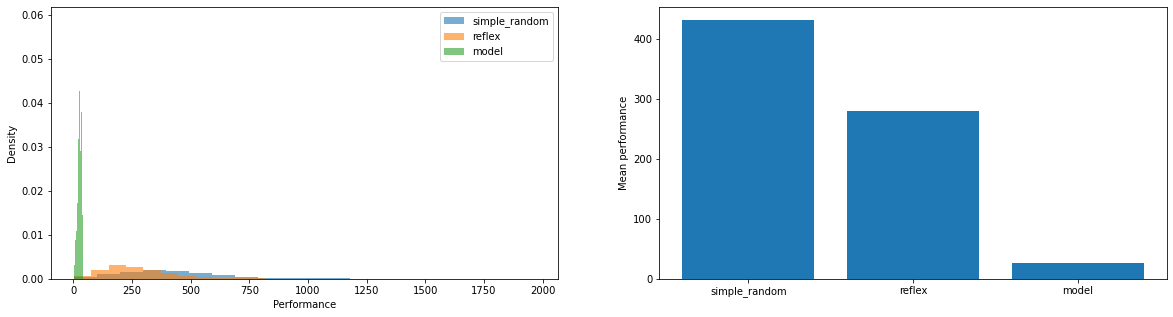

In [89]:
fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.hist(df["simple_random"], bins = 20, alpha = .6, density=True)
plt.hist(df["reflex"], bins = 20, alpha = .6, density=True)
plt.hist(df["model"], bins = 20, alpha = .6, density=True)
plt.xlabel("Performance")
plt.ylabel("Density")
plt.legend(labels = ["simple_random", "reflex", "model"])

plt.subplot(1,2,2)

plt.bar(x=df.keys(), height=df.mean().values)
plt.ylabel("Mean performance")

plt.show()

In [58]:
df.keys()

Index(['simple_random', 'reflex'], dtype='object')

#### Your discussion of the results goes here

## Task 5: Robustness of the agent implementations [1 Point] 

Describe how your agent implementations will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

In [8]:
# Answer goes here

## Bonus tasks [+1 Point]

Change your simulation environment tor run experiments for the following problems:

* __Obstacles:__ Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.
* __Unknown environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square.
* __Utility-based agent:__ Change the environment, so each square has a fixed probability of getting dirty again. We assume the agent has learned this information over time. For the implementation, we give this information to the agent as a 2-dimensional array of probabilities  Cleaning one dirty square produces a utility of 1. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 10000 time steps. This is very tricky!

In [9]:
# Your code and discussion goes here